In [1]:
!pip install numpy pandas scikit-learn


In [1]:

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")



# setup

In [2]:
run_cv = True
use_sample = False

In [3]:

df = pd.read_csv('Final_Data_Includingt_Social_Det_v4.csv')

df.head()


,id,num_of_chronic_conditions,preventive_visit_gap_ind,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,...,rwjf_white_race_pct,rwjf_premature_mortality,rwjf_child_mortality,rwjf_exercise_access_pct,rwjf_life_expectancy,rwjf_firearm_fatalities_rate,rwjf_drug_deaths_modl_rate,rwjf_suicides_rate,rwjf_resident_seg_black_inx,rwjf_resident_seg_nonwhite_inx
0,311804,9,0,18,2,19,2,18,3,0.0,...,0.968581,366.33823,NaN,0.702568,77.55678,NaN,6.0,12.312330,NaN,33.673782
1,977925,2,0,0,0,0,0,0,0,0.0,...,0.419817,335.93228,56.206898,0.991459,79.69024,15.044045,9.0,8.332776,77.336240,51.108280
2,542458,2,0,10,0,2,0,2,0,0.0,...,0.353858,246.60400,45.497320,0.869379,81.22165,9.766202,5.0,12.026644,30.583735,26.082308
3,253820,5,0,6,1,3,0,4,1,0.0,...,0.535387,288.39502,41.312410,0.938080,82.61686,12.335290,14.0,14.147075,53.575610,42.789070
4,1383725,4,0,0,0,0,0,0,0,0.0,...,0.783373,226.83220,51.748880,0.754237,82.42686,19.394392,8.0,22.100859,NaN,28.920433


In [4]:
df.shape

(1527904, 152)

In [5]:
for i in df.columns:
    print(i)

id
num_of_chronic_conditions
preventive_visit_gap_ind
measure_name_lag3
dissatisfaction_cnt_2020
measure_name_lag2
dissatisfaction_cnt_2021
measure_name_lag1
dissatisfaction_cnt_2022
PV_PREV_YR
all_mm_tenure
dual_eligible_ind
disabled_ind
lis_ind
tenure_band_grouped
sex_cd
age
veteran_ind
mco_contract_nbr
pbp_segment_id
region
race
total_ip_health_issues_admit_days_pmpm
nonpar_coins_pmpm_cost
total_coins_pmpm_cost
nonpar_cob_paid_pmpm_cost
total_cob_paid_pmpm_cost
nonpar_copay_pmpm_cost
total_copay_pmpm_cost
days_since_last_clm
nonpar_deduct_pmpm_cost
total_deduct_pmpm_cost
nonpar_mbr_resp_pmpm_cost
total_mbr_resp_pmpm_cost
rx_days_since_last_script
rx_overall_coins_copay_cost
rx_overall_deduct_pmpm_cost
rx_overall_dist_gpi6_pmpm_ct
rx_overall_mbr_resp_pmpm_cost
rx_overall_pmpm_cost
rx_overall_pmpm_ct
rx_pharmacies_pmpm_ct
rx_all_tiers_pmpm_ct
login_count_0
login_count_1
days_since_last_login
login_pmpm_ct
lag_quarter
lag_six_months
cnt_cp_emails_pmpm_ct
cnt_cp_print_pmpm_ct
cnt_cp_vat

In [6]:
if 'age_Tile_Num' in df.columns:
    df.drop('age_Tile_Num', axis = 1, inplace = True)

In [7]:
# cols_sirisha = ['id', 'num_of_chronic_conditions', 'preventive_visit_gap_ind',
#        'measure_name_lag3', 'dissatisfaction_cnt_2020', 'measure_name_lag2',
#        'dissatisfaction_cnt_2021', 'measure_name_lag1',
#        'dissatisfaction_cnt_2022', 'PV_PREV_YR', 'all_mm_tenure',
#        'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_grouped',
#        'sex_cd', 'age', 'veteran_ind', 'nonpar_coins_pmpm_cost',
#        'total_coins_pmpm_cost', 'nonpar_cob_paid_pmpm_cost',
#        'total_cob_paid_pmpm_cost', 'nonpar_copay_pmpm_cost',
#        'total_copay_pmpm_cost', 'nonpar_deduct_pmpm_cost',
#        'nonpar_mbr_resp_pmpm_cost', 'total_mbr_resp_pmpm_cost',
#        'rx_days_since_last_script', 'rx_overall_coins_copay_cost',
#        'rx_overall_deduct_pmpm_cost', 'rx_overall_pmpm_cost',
#        'rx_overall_pmpm_ct', 'rx_pharmacies_pmpm_ct', 'login_count_0',
#        'login_count_1', 'days_since_last_login', 'lag_quarter',
#        'lag_six_months', 'cnt_cp_emails_pmpm_ct', 'cnt_cp_print_pmpm_ct',
#        'cnt_cp_vat_pmpm_ct', 'cnt_cp_webstatement_pmpm_ct',
#        'total_interactions_1', 'channel_Consumer Direct',
#        'channel_DMS Telesales', 'channel_Field', 'channel_Partner Call Center',
#        'lang_spoken_cd', 'rucc_category', 'riskarr_downside', 'riskarr_upside',
#        'riskarr_rewards', 'riskarr_global', 'cms_tot_ma_payment_amt',
#        'cms_tot_partd_payment_amt', 'atlas_ffrpth14',
#        'atlas_povertyallagespct', 'cci_score', 'fci_score', 'dcsi_score',
#        'cms_frailty_ind', 'rwjf_unemploy_pct', 'rwjf_insufficient_sleep_pct',
#        'rwjf_other_pcp', 'rwjf_dentists_ratio', 'rwjf_income_inequ_ratio',
#        'rwjf_drive_alone_pct', 'rwjf_age_gt_65_pct', 'rwjf_uninsured_pct',
#        'rwjf_population', 'rwjf_injury_deaths_rate',
#        'rwjf_social_associate_rate', 'rwjf_pcp_rate', 'rwjf_alcoholic_pct',
#        'rwjf_female_pct', 'rwjf_healthcare_cost', 'rwjf_diabetes_monitor_pct',
#        'rwjf_preventable_ip_rate', 'rwjf_dui_deaths_pct',
#        'rwjf_mammography_pct', 'rwjf_long_commute_alone_pct', 'rwjf_flu_vax',
#        'race_BLACK', 'race_HISPANIC', 'race_N AMERICAN NATIVE', 'race_OTHER',
#        'race_UNKNOWN', 'race_Unknown', 'race_WHITE', 'region_Gulf South',
#        'region_Intermountain', 'region_Midwest', 'region_Northeast',
#        'region_Pacific Southwest', 'region_Puerto Rico',
#        'region_South Central', 'region_Southeast']

In [8]:

for i in df.columns:
  print(df[[i]].isnull().sum())


id    0
dtype: int64
num_of_chronic_conditions    0
dtype: int64
preventive_visit_gap_ind    0
dtype: int64
measure_name_lag3    0
dtype: int64
dissatisfaction_cnt_2020    0
dtype: int64
measure_name_lag2    0
dtype: int64
dissatisfaction_cnt_2021    0
dtype: int64
measure_name_lag1    0
dtype: int64
dissatisfaction_cnt_2022    0
dtype: int64
PV_PREV_YR    198803
dtype: int64
all_mm_tenure    0
dtype: int64
dual_eligible_ind    0
dtype: int64
disabled_ind    0
dtype: int64
lis_ind    0
dtype: int64
tenure_band_grouped    0
dtype: int64
sex_cd    0
dtype: int64
age    0
dtype: int64
veteran_ind    0
dtype: int64
mco_contract_nbr    0
dtype: int64
pbp_segment_id    0
dtype: int64
region    17
dtype: int64
race    0
dtype: int64
total_ip_health_issues_admit_days_pmpm    511
dtype: int64
nonpar_coins_pmpm_cost    511
dtype: int64
total_coins_pmpm_cost    511
dtype: int64
nonpar_cob_paid_pmpm_cost    511
dtype: int64
total_cob_paid_pmpm_cost    511
dtype: int64
nonpar_copay_pmpm_cost    511

In [9]:
ndf = df

In [10]:
#"consec_tenure_month",
ndf.drop(columns = ['atlas_ffrpth14', 'atlas_povertyallagespct', # "total_net_paid_pmpm_cost", 
                    # "nonpar_net_paid_pmpm_cost", "nonpar_mbr_resp_pmpm_cost", 
                   "rx_overall_mbr_resp_pmpm_cost", 'rx_all_tiers_pmpm_ct', 'rx_overall_dist_gpi6_pmpm_ct',
                   "login_count_0", "login_count_1", "login_pmpm_ct", "lag_six_months",
                    'tenure_band_grouped', 'lis_ind', # MEMBER DATA
                   ], axis =1 , inplace=True)

In [11]:
ndf.columns

Index(['id', 'num_of_chronic_conditions', 'preventive_visit_gap_ind',
       'measure_name_lag3', 'dissatisfaction_cnt_2020', 'measure_name_lag2',
       'dissatisfaction_cnt_2021', 'measure_name_lag1',
       'dissatisfaction_cnt_2022', 'PV_PREV_YR',
       ...
       'rwjf_white_race_pct', 'rwjf_premature_mortality',
       'rwjf_child_mortality', 'rwjf_exercise_access_pct',
       'rwjf_life_expectancy', 'rwjf_firearm_fatalities_rate',
       'rwjf_drug_deaths_modl_rate', 'rwjf_suicides_rate',
       'rwjf_resident_seg_black_inx', 'rwjf_resident_seg_nonwhite_inx'],
      dtype='object', length=140)

In [12]:
cleaned_df = ndf
for i in cleaned_df.columns:
    if "atlas" in i:
      print(cleaned_df[[i]].isnull().sum())

atlas_grocpth14    982
dtype: int64
atlas_recfacpth14    982
dtype: int64
atlas_fsrpth14    982
dtype: int64


In [13]:
# prompt: PV_PREV_YR replace nulls with -1

# Replace null values in 'PV_PREV_YR' with -1
ndf['PV_PREV_YR'].fillna(0, inplace=True)

# Verify that null values have been filled
print(ndf[['PV_PREV_YR']].isnull().sum())


PV_PREV_YR    0
dtype: int64


In [14]:

for i in ndf.columns:
  print(ndf[[i]].isnull().sum())

id    0
dtype: int64
num_of_chronic_conditions    0
dtype: int64
preventive_visit_gap_ind    0
dtype: int64
measure_name_lag3    0
dtype: int64
dissatisfaction_cnt_2020    0
dtype: int64
measure_name_lag2    0
dtype: int64
dissatisfaction_cnt_2021    0
dtype: int64
measure_name_lag1    0
dtype: int64
dissatisfaction_cnt_2022    0
dtype: int64
PV_PREV_YR    0
dtype: int64
all_mm_tenure    0
dtype: int64
dual_eligible_ind    0
dtype: int64
disabled_ind    0
dtype: int64
sex_cd    0
dtype: int64
age    0
dtype: int64
veteran_ind    0
dtype: int64
mco_contract_nbr    0
dtype: int64
pbp_segment_id    0
dtype: int64
region    17
dtype: int64
race    0
dtype: int64
total_ip_health_issues_admit_days_pmpm    511
dtype: int64
nonpar_coins_pmpm_cost    511
dtype: int64
total_coins_pmpm_cost    511
dtype: int64
nonpar_cob_paid_pmpm_cost    511
dtype: int64
total_cob_paid_pmpm_cost    511
dtype: int64
nonpar_copay_pmpm_cost    511
dtype: int64
total_copay_pmpm_cost    511
dtype: int64
days_since_la

In [15]:
ndf.shape

(1527904, 140)

In [16]:
ndf.rucc_category.value_counts()

rucc_category
1-Metro       463353
2-Metro       364590
3-Metro       230472
6-Nonmetro    161116
4-Nonmetro    124668
7-Nonmetro     81417
5-Nonmetro     42660
8-Nonmetro     30477
9-Nonmetro     28612
Name: count, dtype: int64

In [17]:
ndf["rucc_category"] = ndf["rucc_category"].replace({"1-Metro":1, "2-Metro":1,"3-Metro":1, "4-Nonmetro": 1, "5-Nonmetro": 0, "6-Nonmetro": 0, "7-Nonmetro": 0, "8-Nonmetro": 0, "9-Nonmetro": 0})



In [18]:
# ndf.drop(columns="rucc_category", axis = 1, inplace = True)
ndf["rucc_category"].fillna(1, inplace=True)

In [19]:
ndf.shape
# preventive_visit_gap_ind

(1527904, 140)

In [20]:
ndf.columns

Index(['id', 'num_of_chronic_conditions', 'preventive_visit_gap_ind',
       'measure_name_lag3', 'dissatisfaction_cnt_2020', 'measure_name_lag2',
       'dissatisfaction_cnt_2021', 'measure_name_lag1',
       'dissatisfaction_cnt_2022', 'PV_PREV_YR',
       ...
       'rwjf_white_race_pct', 'rwjf_premature_mortality',
       'rwjf_child_mortality', 'rwjf_exercise_access_pct',
       'rwjf_life_expectancy', 'rwjf_firearm_fatalities_rate',
       'rwjf_drug_deaths_modl_rate', 'rwjf_suicides_rate',
       'rwjf_resident_seg_black_inx', 'rwjf_resident_seg_nonwhite_inx'],
      dtype='object', length=140)

In [21]:
ndf.isna().sum()

id                                     0
num_of_chronic_conditions              0
preventive_visit_gap_ind               0
measure_name_lag3                      0
dissatisfaction_cnt_2020               0
                                   ...  
rwjf_firearm_fatalities_rate       56761
rwjf_drug_deaths_modl_rate          4614
rwjf_suicides_rate                 48952
rwjf_resident_seg_black_inx       119593
rwjf_resident_seg_nonwhite_inx     12384
Length: 140, dtype: int64

In [22]:
# prompt: replace Unknown with blank

ndf.race.replace('Unknown', "UNKNOWN", inplace=True)


In [23]:
# prompt: one hot encoding for race

# Perform one-hot encoding for the 'race' column
race_encoded = pd.get_dummies(ndf['race'], prefix='race', drop_first=True, dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
ndf = pd.concat([ndf, race_encoded], axis=1)

# Drop the original 'race' column if you no longer need it
ndf = ndf.drop('race', axis=1)

# Print the updated DataFrame to verify the changes
ndf.head()


,id,num_of_chronic_conditions,preventive_visit_gap_ind,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,...,rwjf_drug_deaths_modl_rate,rwjf_suicides_rate,rwjf_resident_seg_black_inx,rwjf_resident_seg_nonwhite_inx,race_BLACK,race_HISPANIC,race_N AMERICAN NATIVE,race_OTHER,race_UNKNOWN,race_WHITE
0,311804,9,0,18,2,19,2,18,3,0.0,...,6.0,12.312330,NaN,33.673782,0,0,0,0,1,0
1,977925,2,0,0,0,0,0,0,0,0.0,...,9.0,8.332776,77.336240,51.108280,1,0,0,0,0,0
2,542458,2,0,10,0,2,0,2,0,0.0,...,5.0,12.026644,30.583735,26.082308,0,0,0,0,1,0
3,253820,5,0,6,1,3,0,4,1,0.0,...,14.0,14.147075,53.575610,42.789070,0,0,0,0,1,0
4,1383725,4,0,0,0,0,0,0,0,0.0,...,8.0,22.100859,NaN,28.920433,0,0,0,1,0,0


In [24]:
ndf.region.value_counts()

region
Southeast            375041
Midwest              342669
South Central        169298
Central              157155
Northeast            114090
Florida              111079
Gulf South           102356
Pacific Southwest    101035
Intermountain         54718
Puerto Rico             446
Name: count, dtype: int64

In [25]:
# prompt: replace Florida with Gulf South for region and perform one hot encoding on region

# Replace 'Florida' with 'Gulf South' in the 'region' column
ndf['region'] = ndf['region'].replace('Florida', 'Gulf South')

# Perform one-hot encoding for the 'region' column
region_encoded = pd.get_dummies(ndf['region'], prefix='region', drop_first=True, dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
ndf = pd.concat([ndf, region_encoded], axis=1)

# Drop the original 'region' column if you no longer need it
ndf = ndf.drop('region', axis=1)

# Print the updated DataFrame to verify the changes
ndf.head()


,id,num_of_chronic_conditions,preventive_visit_gap_ind,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,...,race_UNKNOWN,race_WHITE,region_Gulf South,region_Intermountain,region_Midwest,region_Northeast,region_Pacific Southwest,region_Puerto Rico,region_South Central,region_Southeast
0,311804,9,0,18,2,19,2,18,3,0.0,...,1,0,0,0,1,0,0,0,0,0
1,977925,2,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,542458,2,0,10,0,2,0,2,0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,253820,5,0,6,1,3,0,4,1,0.0,...,1,0,1,0,0,0,0,0,0,0
4,1383725,4,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
ndf.isna().sum()

id                           0
num_of_chronic_conditions    0
preventive_visit_gap_ind     0
measure_name_lag3            0
dissatisfaction_cnt_2020     0
                            ..
region_Northeast             0
region_Pacific Southwest     0
region_Puerto Rico           0
region_South Central         0
region_Southeast             0
Length: 152, dtype: int64

In [27]:
100000/ndf.shape[0]

0.06544913816574863

In [28]:
ndf.num_of_chronic_conditions.replace(-1, 1, inplace=True)

In [29]:
# ndf.columns

In [30]:
# for i in cols_sirisha:
#     if i not in ndf:
#         print(i)

In [31]:
# cleaned_df = ndf[cols_sirisha]

# Outliers

In [32]:
unicounts = ndf.nunique()

cont_cols = [unicounts.index[i] for i in range(len(unicounts)) if unicounts[i] > 2]

In [33]:
len(cont_cols)

118

In [34]:
cont_cols.remove("id")

In [35]:
cleaned_df = ndf

In [36]:
def rem_outliers(col):
    data = cleaned_df[col]
    iqr = data.quantile(.75) - data.quantile(.25)

    up_bound = data.quantile(.75) + (iqr * 1.5)
    lower_bound = data.quantile(.25) - (iqr * 1.5)
    print (lower_bound, iqr, up_bound)
    cleaned_df[col] = cleaned_df[col].apply(lambda x: up_bound if x >= up_bound else x)
    cleaned_df[col] = cleaned_df[col].apply(lambda y: lower_bound if y < lower_bound else y)
    print(col, ": outliers_updated")



In [37]:
for i in cont_cols:
    rem_outliers(i)

-3.5 3.0 8.5
num_of_chronic_conditions : outliers_updated
-6.0 4.0 10.0
measure_name_lag3 : outliers_updated
-1.5 1.0 2.5
dissatisfaction_cnt_2020 : outliers_updated
-6.0 4.0 10.0
measure_name_lag2 : outliers_updated
-1.5 1.0 2.5
dissatisfaction_cnt_2021 : outliers_updated
-6.0 4.0 10.0
measure_name_lag1 : outliers_updated
-1.5 1.0 2.5
dissatisfaction_cnt_2022 : outliers_updated
-66.5 59.0 169.5
all_mm_tenure : outliers_updated
50.5 11.0 94.5
age : outliers_updated
0.0 0.0 0.0
total_ip_health_issues_admit_days_pmpm : outliers_updated
0.0 0.0 0.0
nonpar_coins_pmpm_cost : outliers_updated
-8.681249999999999 5.7875 14.468749999999998
total_coins_pmpm_cost : outliers_updated
0.0 0.0 0.0
nonpar_cob_paid_pmpm_cost : outliers_updated
0.0 0.0 0.0
total_cob_paid_pmpm_cost : outliers_updated
0.0 0.0 0.0
nonpar_copay_pmpm_cost : outliers_updated
-69.99999999999994 48.3333333333333 123.33333333333324
total_copay_pmpm_cost : outliers_updated
-65.5 55.0 154.5
days_since_last_clm : outliers_updated
0

rwjf_hawaiian_race_pct : outliers_updated
-0.031895086999999996 0.02618454 0.072843073
rwjf_asian_race_pct : outliers_updated
0.066842125 0.09563247 0.449372005
rwjf_single_parent_pct : outliers_updated
-0.018818908999999988 0.036461341999999994 0.12702645899999998
rwjf_uninsured_child_pct : outliers_updated
0.11699451 0.29706566 1.30525715
rwjf_white_race_pct : outliers_updated
119.27800499999992 135.40513000000004 660.8985250000001
rwjf_premature_mortality : outliers_updated
13.6967775 20.535085000000002 95.8371175
rwjf_child_mortality : outliers_updated
0.23324357499999998 0.26692733 1.300952895
rwjf_exercise_access_pct : outliers_updated
70.55763999999999 3.6530400000000043 85.16980000000001
rwjf_life_expectancy : outliers_updated
-0.04547050000000219 7.237753000000001 28.905541500000005
rwjf_firearm_fatalities_rate : outliers_updated
-1.5 5.0 18.5
rwjf_drug_deaths_modl_rate : outliers_updated
3.0765935000000013 6.400205 28.6774135
rwjf_suicides_rate : outliers_updated
10.213128999

In [38]:
# prompt: stratified sample of 10000 rows from ndf without using train_test_split
ndf = cleaned_df
# Assuming 'preventive_visit_gap_ind' is the column you want to stratify by
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=42)

for train_index, test_index in split.split(ndf, ndf['preventive_visit_gap_ind']):
  strat_sample = ndf.iloc[test_index]


print(strat_sample.shape)



(10000, 152)


In [39]:
# prompt: train test split target is preventive_visit_gap_ind

from sklearn.model_selection import train_test_split

sdf = cleaned_df if use_sample == False else strat_sample

# Define your features (X) and target (y)
X = sdf.drop('preventive_visit_gap_ind', axis=1)
y = sdf['preventive_visit_gap_ind']

# Split the data into training and testing sets
train_data, test_data = train_test_split(sdf,  test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

print("train shape:", train_data.shape)
print("test shape:", test_data.shape)


train shape: (1222323, 152)
test shape: (305581, 152)


In [40]:
median_partd_payment = train_data['cms_tot_partd_payment_amt'].median()
median_ma_payment = train_data['cms_tot_ma_payment_amt'].median()

# Fill null values with the calculated medians
train_data['cms_tot_partd_payment_amt'].fillna(median_partd_payment, inplace=True)
train_data['cms_tot_ma_payment_amt'].fillna(median_ma_payment, inplace=True)

# Verify that null values have been filled
print(train_data[['cms_tot_partd_payment_amt', 'cms_tot_ma_payment_amt']].isnull().sum())

cms_tot_partd_payment_amt    0
cms_tot_ma_payment_amt       0
dtype: int64


In [41]:
median_partd_payment = test_data['cms_tot_partd_payment_amt'].median()
median_ma_payment = test_data['cms_tot_ma_payment_amt'].median()

# Fill null values with the calculated medians
test_data['cms_tot_partd_payment_amt'].fillna(median_partd_payment, inplace=True)
test_data['cms_tot_ma_payment_amt'].fillna(median_ma_payment, inplace=True)

# Verify that null values have been filled
print(test_data[['cms_tot_partd_payment_amt', 'cms_tot_ma_payment_amt']].isnull().sum())

cms_tot_partd_payment_amt    0
cms_tot_ma_payment_amt       0
dtype: int64


In [42]:
train_data.dropna(inplace = True)
test_data.dropna(inplace = True)

In [43]:

for i in train_data.columns:
  print(train_data[[i]].isnull().sum())


id    0
dtype: int64
num_of_chronic_conditions    0
dtype: int64
preventive_visit_gap_ind    0
dtype: int64
measure_name_lag3    0
dtype: int64
dissatisfaction_cnt_2020    0
dtype: int64
measure_name_lag2    0
dtype: int64
dissatisfaction_cnt_2021    0
dtype: int64
measure_name_lag1    0
dtype: int64
dissatisfaction_cnt_2022    0
dtype: int64
PV_PREV_YR    0
dtype: int64
all_mm_tenure    0
dtype: int64
dual_eligible_ind    0
dtype: int64
disabled_ind    0
dtype: int64
sex_cd    0
dtype: int64
age    0
dtype: int64
veteran_ind    0
dtype: int64
mco_contract_nbr    0
dtype: int64
pbp_segment_id    0
dtype: int64
total_ip_health_issues_admit_days_pmpm    0
dtype: int64
nonpar_coins_pmpm_cost    0
dtype: int64
total_coins_pmpm_cost    0
dtype: int64
nonpar_cob_paid_pmpm_cost    0
dtype: int64
total_cob_paid_pmpm_cost    0
dtype: int64
nonpar_copay_pmpm_cost    0
dtype: int64
total_copay_pmpm_cost    0
dtype: int64
days_since_last_clm    0
dtype: int64
nonpar_deduct_pmpm_cost    0
dtype: in

In [44]:
# Now, you can separate the target variable from both training and testing sets
y_train = train_data[['id', 'preventive_visit_gap_ind']]
X_train = train_data.drop('preventive_visit_gap_ind', axis=1)

y_test = test_data[['id', 'preventive_visit_gap_ind']]
X_test = test_data.drop('preventive_visit_gap_ind', axis=1)


# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (974414, 151)
X_test shape: (243702, 151)
y_train shape: (974414, 2)
y_test shape: (243702, 2)


In [45]:
X_train.drop(columns=['id'], axis = 1, inplace=True)
X_test.drop(columns=['id'], axis = 1, inplace=True)

In [46]:
X_train.head()

,num_of_chronic_conditions,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,all_mm_tenure,dual_eligible_ind,...,race_UNKNOWN,race_WHITE,region_Gulf South,region_Intermountain,region_Midwest,region_Northeast,region_Pacific Southwest,region_Puerto Rico,region_South Central,region_Southeast
223127,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,1,...,1,0,0,0,0,0,0,0,1,0
277055,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,...,1,0,1,0,0,0,0,0,0,0
539673,1.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,102.0,0,...,0,1,0,0,0,0,0,0,0,1
1394336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0,...,0,1,0,0,0,0,0,0,0,0
1363487,2.0,7.0,2.0,10.0,2.5,10.0,2.5,0.0,40.0,0,...,1,0,0,0,0,1,0,0,0,0


In [47]:
X_train.shape

(974414, 150)

In [48]:
# prompt: create a function to calculate accuracy, confusion matrix, auc score

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def evaluate_model(y_true, y_pred, y_prob=None):
  """
  Calculates accuracy, confusion matrix, and AUC score for a model.

  Args:
    y_true: True labels.
    y_pred: Predicted labels.
    y_prob: Predicted probabilities (optional for AUC score).

  Returns:
    A dictionary containing accuracy, confusion matrix, and AUC score.
  """
  results = {}
  results['test_accuracy'] = accuracy_score(y_true, y_pred)
  results['confusion_matrix'] = confusion_matrix(y_true, y_pred)
  if y_prob is not None:
    results['auc'] = roc_auc_score(y_true, y_prob)
  return results


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import time
gridParams = {
    'learning_rate': [0.05],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['auc']
    }

#modelling
clf = lgb.LGBMRegressor()
start_time = time.time()
grid = RandomizedSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1,n_iter=10)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")
grid.fit(X_train,y_train)
print("Best parameters (LightGBM):", grid_search_lgb.best_params_)
print("Best score (LightGBM):", grid_search_lgb.best_score_)


    # Get the best model from the grid search
best_lgb_model = grid.best_estimator_


    # Make predictions on the test set using the best model
y_pred_lgb = best_lgb_model.predict(X_test)


    # Evaluate the model
lgb_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_lgb)

    # Print the evaluation results
print("LightGBM Results:")
y_pred_train = best_lgb_model.predict(X_train)
print("Train Accuracy ", accuracy_score(y_train.drop("id", axis=1), y_pred_train))
print("Test Accuracy:", lgb_results['test_accuracy'])
print("Confusion Matrix:\n", lgb_results['confusion_matrix'])
if 'auc' in lgb_results:
    print("AUC:", lgb_results['auc'])

Execution time: 8.0108642578125e-05 seconds
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [98]:
# prompt: LightGBM modeling

# !pip install lightgbm

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import time

if run_cv:
    print("running cv")
    # Create a LightGBM classifier
    lgb_classifier = lgb.LGBMClassifier(random_state=42, verbose = -1)


    # Define the parameter grid for LightGBM
    param_grid_lgb = {
        'n_estimators': [1000],
        'learning_rate': [0.05],
        'max_depth': [18],
        # 'num_leaves': [63],
        'subsample': [0.5],
        'class_weight': ['balanced'],
        'lambda_l1': [ 20 ] ,

    }

    # Create a GridSearchCV object for LightGBM
    grid_search_lgb = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid_lgb, cv=10, scoring='roc_auc')



    start_time = time.time()

    # Fit the grid search to the training data
    grid_search_lgb.fit(X_train, y_train.drop("id", axis = 1))

    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")

    # Print the best parameters and the best score
    print("Best parameters (LightGBM):", grid_search_lgb.best_params_)
    print("Best score (LightGBM):", grid_search_lgb.best_score_)


    # Get the best model from the grid search
    best_lgb_model = grid_search_lgb.best_estimator_


    # Make predictions on the test set using the best model
    y_pred_lgb = best_lgb_model.predict(X_test)


    # Evaluate the model
    lgb_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_lgb)

    # Print the evaluation results
    print("LightGBM Results:")
    y_pred_train = best_lgb_model.predict(X_train)
    print("Train Accuracy ", accuracy_score(y_train.drop("id", axis=1), y_pred_train))
    print("Test Accuracy:", lgb_results['test_accuracy'])
    print("Confusion Matrix:\n", lgb_results['confusion_matrix'])
    if 'auc' in lgb_results:
        print("AUC:", lgb_results['auc'])





    roc_auc_score(y_test.drop("id", axis = 1), y_pred_lgb)


running cv
Execution time: 874.6095848083496 seconds
Best parameters (LightGBM): {'class_weight': 'balanced', 'lambda_l1': 20, 'learning_rate': 0.05, 'max_depth': 18, 'n_estimators': 1000, 'subsample': 0.5}
Best score (LightGBM): 0.7516343215339979
LightGBM Results:
Train Accuracy  0.6956868435798336
Test Accuracy: 0.6845778861068026
Confusion Matrix:
 [[97681 38792]
 [38077 69152]]


In [ ]:
joblib.dump(lgbm1, "keerthi_final_lgbm1_v1.pkl") 

In [50]:
# !pip install scikit-optimize
from skopt import BayesSearchCV

opt = BayesSearchCV(
    estimator=lgb_classifier,
    search_spaces=param_grid_lgb,
    n_iter=32,
    cv=10,
    scoring='roc_auc'
)

start_time = time.time()

# Fit the grid search to the training data
opt.fit(X_train, y_train.drop("id", axis = 1))

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

# Print the best parameters and the best score
print("Best parameters (LightGBM):", opt.best_params_)
print("Best score (LightGBM):", opt.best_score_)

ModuleNotFoundError: No module named 'skopt'

In [ ]:

# !pip install shap

import shap

# Assuming you have your trained model (e.g., best_lgb_model) and your training data (X_train)

# Create a TreeExplainer object (for tree-based models like LightGBM)
explainer = shap.TreeExplainer(best_lgb_model)

# Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# You can now analyze the SHAP values to identify important features
# For example, you can visualize the feature importance using SHAP's summary_plot
shap.summary_plot(shap_values, X_train)


In [ ]:
fea_imp = pd.DataFrame({'column_name_LGBM': X_train.columns, 'importance': best_lgb_model.feature_importances_})
# fea_imp[fea_imp["importance"] == 0]["column_name_LGBM"]
cols = [col for col in fea_imp["column_name_LGBM"] if 'race' in col]
print(cols)
fea_imp.sort_values('importance', ascending= False).head(40)

In [ ]:
ndf.groupby('preventive_visit_gap_ind').agg({"days_since_last_clm":'mean', 'cnt_cp_webstatement_pmpm_ct' : 'mean'})

In [ ]:
fea_imp[fea_imp["importance"] == 0]["column_name_LGBM"]


# LightGBM

In [99]:
# {'class_weight': 'balanced', 'lambda_l1': 8, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 800, 'subsample': 0.5}


import lightgbm as lgb
lgbm1 = lgb.LGBMClassifier(class_weight = 'balanced', lambda_l1= 20, learning_rate=0.05, 
                           max_depth=18, n_estimators=1000,  verbose = -1, 
                           subsample= 0.5, random_state=42)

lgbm1.fit(X_train, y_train.drop("id", axis = 1))

# Make predictions on the test set using the best model
y_pred_lgb = lgbm1.predict(X_test)


# Evaluate the model
lgb_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_lgb)

# Print the evaluation results
print("LightGBM Results:")

print("Accuracy:", lgb_results['test_accuracy'])
print("Confusion Matrix:\n", lgb_results['confusion_matrix'])
if 'auc' in lgb_results:
    print("AUC:", lgb_results['auc'])

roc_auc_score(y_test.drop("id", axis = 1), y_pred_lgb)

LightGBM Results:
Accuracy: 0.6845778861068026
Confusion Matrix:
 [[97681 38792]
 [38077 69152]]


0.680326733059919

In [100]:
# model = pickle.load("charan_final_lgbm1_v1.pkl")
import joblib
# model = joblib.load('keerthi_final_lgbm1_v1.pkl')


joblib.dump(lgbm1, "keerthi_final_lgbm1_v1.pkl") 

['keerthi_final_lgbm1_v1.pkl']

In [101]:
for i in X_train.columns:
    print("'"+i+"',")

'num_of_chronic_conditions',
'measure_name_lag3',
'dissatisfaction_cnt_2020',
'measure_name_lag2',
'dissatisfaction_cnt_2021',
'measure_name_lag1',
'dissatisfaction_cnt_2022',
'PV_PREV_YR',
'all_mm_tenure',
'dual_eligible_ind',
'disabled_ind',
'sex_cd',
'age',
'veteran_ind',
'mco_contract_nbr',
'pbp_segment_id',
'total_ip_health_issues_admit_days_pmpm',
'nonpar_coins_pmpm_cost',
'total_coins_pmpm_cost',
'nonpar_cob_paid_pmpm_cost',
'total_cob_paid_pmpm_cost',
'nonpar_copay_pmpm_cost',
'total_copay_pmpm_cost',
'days_since_last_clm',
'nonpar_deduct_pmpm_cost',
'total_deduct_pmpm_cost',
'nonpar_mbr_resp_pmpm_cost',
'total_mbr_resp_pmpm_cost',
'rx_days_since_last_script',
'rx_overall_coins_copay_cost',
'rx_overall_deduct_pmpm_cost',
'rx_overall_pmpm_cost',
'rx_overall_pmpm_ct',
'rx_pharmacies_pmpm_ct',
'days_since_last_login',
'lag_quarter',
'cnt_cp_emails_pmpm_ct',
'cnt_cp_print_pmpm_ct',
'cnt_cp_vat_pmpm_ct',
'cnt_cp_webstatement_pmpm_ct',
'total_interactions_0',
'total_interactions_1',


In [103]:
X_train.shape

(974414, 150)

In [102]:
# Make predictions on the test set using the best model
y_pred_lgb = model.predict(X_test)


# Evaluate the model
lgb_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_lgb)

# Print the evaluation results
print("LightGBM Results:")

print("Accuracy:", lgb_results['test_accuracy'])
print("Confusion Matrix:\n", lgb_results['confusion_matrix'])
if 'auc' in lgb_results:
    print("AUC:", lgb_results['auc'])

roc_auc_score(y_test.drop("id", axis = 1), y_pred_lgb)

NameError: name 'model' is not defined

In [59]:
lgbm1.feature_name_

['num_of_chronic_conditions',
 'measure_name_lag3',
 'dissatisfaction_cnt_2020',
 'measure_name_lag2',
 'dissatisfaction_cnt_2021',
 'measure_name_lag1',
 'dissatisfaction_cnt_2022',
 'PV_PREV_YR',
 'all_mm_tenure',
 'dual_eligible_ind',
 'disabled_ind',
 'sex_cd',
 'age',
 'veteran_ind',
 'mco_contract_nbr',
 'pbp_segment_id',
 'total_ip_health_issues_admit_days_pmpm',
 'nonpar_coins_pmpm_cost',
 'total_coins_pmpm_cost',
 'nonpar_cob_paid_pmpm_cost',
 'total_cob_paid_pmpm_cost',
 'nonpar_copay_pmpm_cost',
 'total_copay_pmpm_cost',
 'days_since_last_clm',
 'nonpar_deduct_pmpm_cost',
 'total_deduct_pmpm_cost',
 'nonpar_mbr_resp_pmpm_cost',
 'total_mbr_resp_pmpm_cost',
 'rx_days_since_last_script',
 'rx_overall_coins_copay_cost',
 'rx_overall_deduct_pmpm_cost',
 'rx_overall_pmpm_cost',
 'rx_overall_pmpm_ct',
 'rx_pharmacies_pmpm_ct',
 'days_since_last_login',
 'lag_quarter',
 'cnt_cp_emails_pmpm_ct',
 'cnt_cp_print_pmpm_ct',
 'cnt_cp_vat_pmpm_ct',
 'cnt_cp_webstatement_pmpm_ct',
 'total_

In [61]:
pd.DataFrame({'column_name_LGBM': X_train.columns, 'importance': lgbm1.feature_importances_}).sort_values('importance', ascending=False).head(50)

,column_name_LGBM,importance
0,num_of_chronic_conditions,306
39,cnt_cp_webstatement_pmpm_ct,303
32,rx_overall_pmpm_ct,272
50,riskarr_upside,265
12,age,259
54,cms_tot_partd_payment_amt,247
84,rwjf_insufficient_sleep_pct,247
53,cms_tot_ma_payment_amt,240
60,rwjf_preventable_ip_rate,225
83,rwjf_social_associate_rate,213


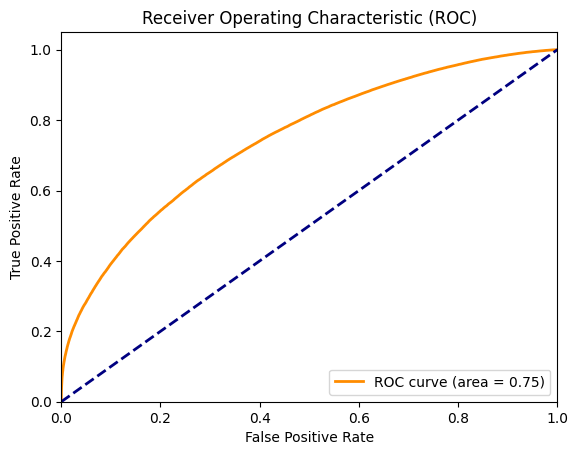

In [57]:
# prompt: auc roc plot

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred_proba from your model
# y_pred_proba = your_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
probs = lgbm1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test.drop("id", axis =1 ), probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


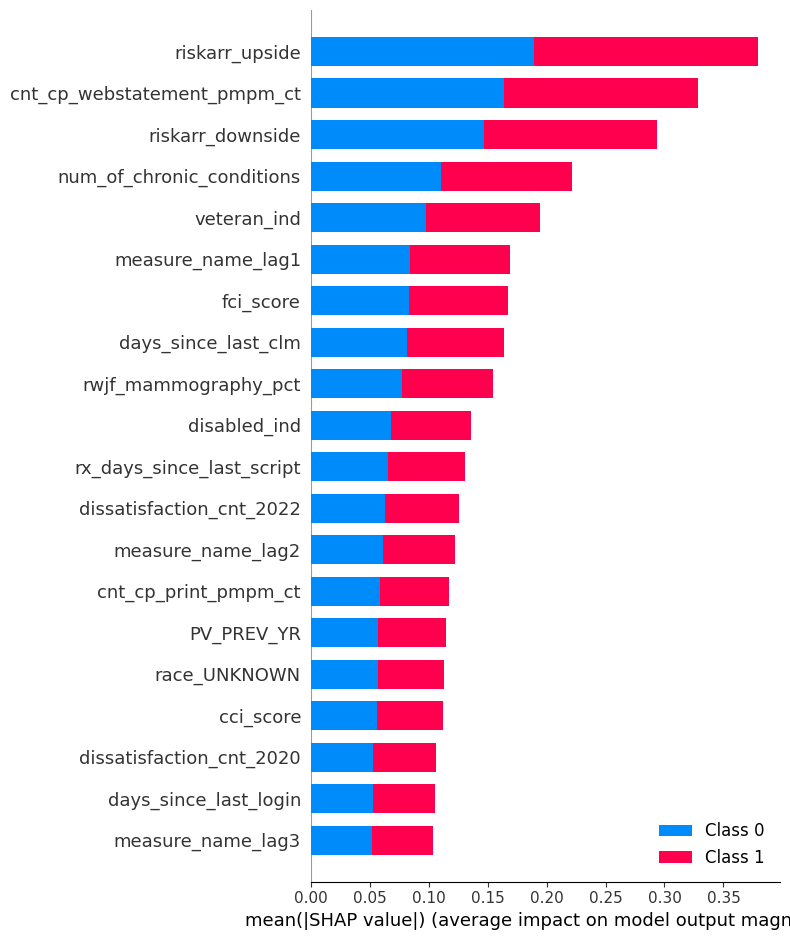

In [60]:

# !pip install shap

import shap

# Assuming you have your trained model (e.g., best_lgb_model) and your training data (X_train)

# Create a TreeExplainer object (for tree-based models like LightGBM)
explainer = shap.TreeExplainer(lgbm1)

# Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# You can now analyze the SHAP values to identify important features
# For example, you can visualize the feature importance using SHAP's summary_plot
shap.summary_plot(shap_values, X_train)


In [58]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
cv_scores = cross_val_score(lgbm1, X_train, y_train.drop("id", axis = 1), cv=10, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.72349592 0.72626343 0.72323654 0.72124665 0.7255207  0.72402315
 0.72389549 0.72779036 0.72491834 0.72507132]
Mean CV score: 0.7245461914565644
Standard deviation of CV scores: 0.0017099608128807794


In [103]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
cv_scores = cross_val_score(lgbm1, X_test, y_test.drop("id", axis = 1), cv=10, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.72126812 0.72369188 0.71933465 0.71975909 0.7192151  0.72072816
 0.7225509  0.72263255 0.71644123 0.72292535]
Mean CV score: 0.7208547040809747
Standard deviation of CV scores: 0.0021033263502704892


In [152]:
pd.DataFrame({'column_name_LGBM': X_train.columns, 'importance': lgbm1.feature_importances_}).sort_values('importance', ascending=False).head(50)

,column_name_LGBM,importance
0,num_of_chronic_conditions,326
34,total_net_paid_pmpm_cost,255
43,rx_all_tiers_pmpm_ct,226
67,cms_tot_ma_payment_amt,219
28,days_since_last_clm,213
68,cms_tot_partd_payment_amt,209
53,cnt_cp_webstatement_pmpm_ct,172
5,measure_name_lag1,162
32,total_mbr_resp_pmpm_cost,133
69,cci_score,131


In [40]:
# prompt: Xgboost modeling

!pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.5],
    'colsample_bytree': [0.8, 1.0]
}

# Create a GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='roc_auc')


st = time.time()
# Fit the grid search to the training data
grid_search_xgb.fit(X_train, y_train.drop("id", axis = 1))

end_time = time.time()
execution_time = end_time - st
print("Execution time:", execution_time, "seconds")

# Print the best parameters and the best score
print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best score (XGBoost):", grid_search_xgb.best_score_)

# Get the best model from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
xgb_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_xgb)

# Print the evaluation results
print("XGBoost Results:")
print("Accuracy:", xgb_results['test_accuracy'])
print("Confusion Matrix:\n", xgb_results['confusion_matrix'])
if 'auc' in xgb_results:
    print("AUC:", xgb_results['auc'])

roc_auc_score(y_test.drop("id", axis = 1), y_pred_xgb)


Execution time: 835.0702080726624 seconds
Best parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}
Best score (XGBoost): 0.7415915240526993
XGBoost Results:
Accuracy: 0.6796814131480912
Confusion Matrix:
 [[136546  31479]
 [ 66370  71079]]


0.6648914345342622

In [39]:
# Print the best parameters and the best score
print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best score (XGBoost):", grid_search_xgb.best_score_)


Best parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best score (XGBoost): 0.7243870519854329


In [51]:
# Get the best model from the grid search
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
xgb_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_xgb)
# y_pred_xgb = best_xgb_model.predict(X_test)
# Print the evaluation results
print("XGBoost Results:")
print("Accuracy:", xgb_results['test_accuracy'])
print("Confusion Matrix:\n", xgb_results['confusion_matrix'])
if 'auc' in xgb_results:
    print("AUC:", xgb_results['auc'])

XGBoost Results:
Accuracy: 0.6680765390470267
Confusion Matrix:
 [[136656  31596]
 [ 69795  67418]]


# XGboost

In [38]:
#!pip install xgboost

     |████████████████████████████████| 4.5 MB 1.4 MB/s eta 0:00:01


In [39]:
import xgboost
xgb1 = xgboost.XGBClassifier(random_state=42, learning_rate=.1, max_depth=5, n_estimators=200, subsample = 1.0, colsample_bytree=1)

xgb1.fit(X_train, y_train.drop("id", axis = 1))

# Make predictions on the test set using the best model
y_pred_xgb = xgb1.predict(X_test)


# Evaluate the model
xgb_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_xgb)

# Print the evaluation results
print("XGboost Results:")
print("Accuracy:", xgb_results['test_accuracy'])
print("Confusion Matrix:\n", xgb_results['confusion_matrix'])
if 'auc' in xgb_results:
    print("AUC:", xgb_results['auc'])

roc_auc_score(y_test, y_pred_xgb)

XGboost Results:
Accuracy: 0.6795046386926547
Confusion Matrix:
 [[136932  31093]
 [ 66810  70639]]


ValueError: multiclass-multioutput format is not supported

In [43]:
xgb1.save_model("XGBoost_Model_v1.pkl")

In [44]:
# import pickle

# xgb1 = pickle.load(open("o1.modeel.pkl", "rb"))

UnpicklingError: invalid load key, '{'.

In [45]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
cv_scores = cross_val_score(xgb1, X_test, y_test.drop("id", axis = 1), cv=20, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.72268121 0.71894189 0.7261169  0.71929002 0.7174909  0.71879621
 0.7197468  0.71728176 0.71879634 0.71917157 0.72135579 0.71892612
 0.72070012 0.72479647 0.72626932 0.71627101 0.71856083 0.71273361
 0.72396042 0.72259075]
Mean CV score: 0.7202239003430171
Standard deviation of CV scores: 0.003313041961672463


In [42]:
# prompt: catboost modeling

!pip install catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose to 0 to suppress output during training

# Define the parameter grid for CatBoost (you can adjust these)
param_grid_catboost = {
    'iterations': [300, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3],
}

# Create a GridSearchCV object for CatBoost
grid_search_catboost = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid_catboost, cv=5, scoring='roc_auc')

st = time.time()
# Fit the grid search to the training data
grid_search_catboost.fit(X_train, y_train.drop("id", axis = 1))
end_time = time.time()
execution_time = end_time - st
print("Execution time:", execution_time, "seconds")


# Print the best parameters and the best score
print("Best parameters (CatBoost):", grid_search_catboost.best_params_)
print("Best score (CatBoost):", grid_search_catboost.best_score_)

# Get the best model from the grid search
best_catboost_model = grid_search_catboost.best_estimator_

# Make predictions on the test set using the best model
y_pred_catboost = best_catboost_model.predict(X_test)

# Evaluate the model
catboost_results = evaluate_model(y_test.drop("id", axis = 1), y_pred_catboost)

# Print the evaluation results
print("CatBoost Results:")
print("Accuracy:", catboost_results['test_accuracy'])
print("Confusion Matrix:\n", catboost_results['confusion_matrix'])
if 'auc' in catboost_results:
    print("AUC:", catboost_results['auc'])

roc_auc_score(y_test.drop("id", axis = 1), y_pred_catboost)


Execution time: 970.3465797901154 seconds
Best parameters (CatBoost): {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best score (CatBoost): 0.7242425869812295
CatBoost Results:
Accuracy: 0.6679455911479221
Confusion Matrix:
 [[136559  31693]
 [ 69738  67475]]


0.6516937183367724

In [50]:
y_test.head()

,id,preventive_visit_gap_ind
1126834,1549913,0
628269,274348,0
524345,542085,0
1243373,1304592,0
668536,1952981,0


In [67]:
td = pd.read_csv("training_results.csv")

In [68]:
evaluate_model(y_test.drop("id", axis = 1), td.y_pred)

{'test_accuracy': 0.506722727600186,
 'confusion_matrix': array([[94247, 73758],
        [76880, 60497]])}

In [55]:
tdf = td.join(y_test, on="id", how='inner', lsuffix = "left")

In [56]:
tdf.shape

(46547, 7)

In [57]:
y_test.to_csv("y_test.csv")

In [58]:
test_data.shape

(305382, 118)

In [60]:
test_data.to_csv("test_data.csv")

In [69]:
X_test.shape

(305382, 116)